In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
from fastai.distributed import *
import os

In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
s3fs is already the newest version (1.82-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!mkdir /s3

mkdir: cannot create directory ‘/s3’: File exists
s3fs: MOUNTPOINT directory /s3 is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


Training Sex Classifier

In [ ]:
df = pd.read_csv('/content/mimic_gender_split.csv')
df['path'] = 's3/MIMIC/mimic-cxr-jpg/2.0.0/' + df['path'].astype(str)
df['path']=df['path'].str.replace('dcm','jpg')
df = df.rename(columns={'path': "Path"})

In [ ]:
train_df = df[df.split=='train']
val_df = df[df.split=='val']
test_df = df[df.split=='test']
train_df.insert(loc = 1, column = 'Valid_Column', value = False)
val_df.insert(loc = 1, column = 'Valid_Column', value = True)
training_df = pd.concat([train_df, val_df])

In [ ]:
import torch; print(torch.cuda.is_available())

True


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.221431,0.161641,0.936246,5:40:43


Better model found at epoch 0 with accuracy value: 0.9362457990646362.


epoch,train_loss,valid_loss,accuracy,time
0,0.104877,0.064521,0.975852,5:36:56
1,0.092218,0.098952,0.963226,5:40:40
2,0.073986,0.049412,0.981661,5:40:10
3,0.069465,0.041691,0.985118,5:37:40


Better model found at epoch 0 with accuracy value: 0.9758521318435669.
No improvement since epoch 0: early stopping


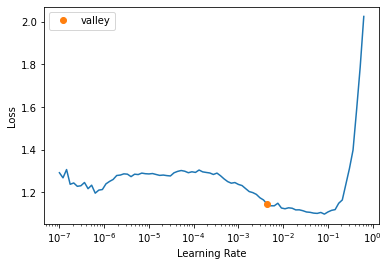

In [ ]:
path = '/'
dls_gender = ImageDataLoaders.from_df(training_df, path, fn_col='Path', label_col='Gender', valid_col = 'Valid_Column', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=10, device=torch.device('cuda'))
learn_gender = vision_learner(dls_gender, resnet34, metrics=accuracy)
learn_gender.model.to(device=torch.device('cuda'))
lrs = learn_gender.lr_find()
learn_gender.fine_tune(20, base_lr = lrs.valley, cbs = [EarlyStoppingCallback(monitor = 'accuracy', min_delta = 0.01, patience = 3), SaveModelCallback(monitor='accuracy', min_delta = 0.01)])
learn_gender.export(fname = '/content/sample_data/mimic_gender.pkl')

Training Age Classifier

In [ ]:
df = pd.read_csv('/content/mimic_age_split.csv')
df['path'] = 's3/MIMIC/mimic-cxr-jpg/2.0.0/' + df['path'].astype(str)
df['path']=df['path'].str.replace('dcm','jpg')
df = df.rename(columns={'path': "Path"})

In [ ]:
train_df = df[df.split=='train']
val_df = df[df.split=='val']
test_df = df[df.split=='test']

In [ ]:
train_df.insert(loc = 1, column = 'Valid_Column', value = False)
val_df.insert(loc = 1, column = 'Valid_Column', value = True)
training_df = pd.concat([train_df, val_df])

In [ ]:
import torch; print(torch.cuda.is_available())

True


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,1.052390,0.991109,0.547782,6:06:03


Better model found at epoch 0 with accuracy value: 0.5477824807167053.


epoch,train_loss,valid_loss,accuracy,time
0,0.848603,0.792309,0.655316,6:09:23
1,0.777572,0.768087,0.663535,6:26:05
2,0.740537,0.748283,0.674645,6:44:25
3,0.731999,0.737311,0.676271,6:09:50
4,0.721279,0.752594,0.670265,6:05:00
5,0.697135,0.735407,0.679523,6:02:50


Better model found at epoch 0 with accuracy value: 0.6553156971931458.
Better model found at epoch 2 with accuracy value: 0.6746454834938049.
No improvement since epoch 2: early stopping


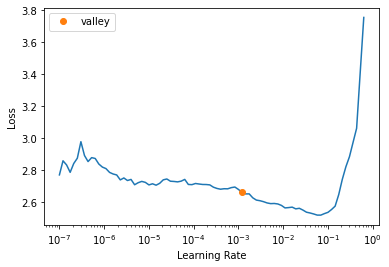

In [ ]:
path = '/'
dls_age = ImageDataLoaders.from_df(training_df, path, fn_col='Path', label_col='Patient Age Category', valid_col = 'Valid_Column', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=10, device=torch.device('cuda'))
learn_age = vision_learner(dls_age, resnet34, metrics=accuracy)
lrs = learn_age.lr_find()
learn_age.fine_tune(40, base_lr = lrs.valley, cbs = [EarlyStoppingCallback(monitor = 'accuracy', min_delta = 0.01, patience = 3), SaveModelCallback(monitor='accuracy', min_delta = 0.01)])
learn_age.export(fname = '/content/sample_data/mimic_age.pkl')

Training Race Classifier

In [ ]:
df = pd.read_csv('/content/mimic_race_split.csv')
df['path'] = 's3/MIMIC/mimic-cxr-jpg/2.0.0/' + df['path'].astype(str)
df['path']=df['path'].str.replace('dcm','jpg')
df = df.rename(columns={'path': "Path"})

In [ ]:
train_df = df[df.split=='train']
val_df = df[df.split=='val']
test_df = df[df.split=='test']

In [ ]:
train_df.insert(loc = 1, column = 'Valid_Column', value = False)
val_df.insert(loc = 1, column = 'Valid_Column', value = True)
training_df = pd.concat([train_df, val_df])

In [ ]:
import torch; print(torch.cuda.is_available())

True


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.870319,0.780149,0.747282,5:18:36


Better model found at epoch 0 with accuracy value: 0.7472816109657288.


epoch,train_loss,valid_loss,accuracy,time
0,0.640656,0.603275,0.811750,5:19:35
1,0.604355,0.578540,0.818913,5:24:50
2,0.542111,0.525567,0.837825,5:20:23
3,0.504997,0.520495,0.838495,5:18:28
4,0.469075,0.524323,0.838238,5:17:31
5,0.458375,0.505155,0.845968,5:25:21


Better model found at epoch 0 with accuracy value: 0.8117495775222778.
Better model found at epoch 2 with accuracy value: 0.8378252983093262.
No improvement since epoch 2: early stopping


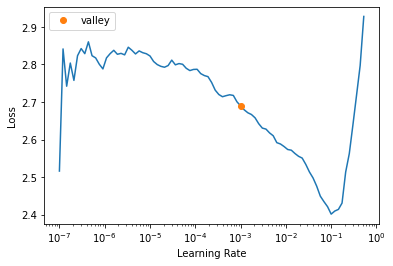

In [ ]:
path = '/'
dls_race = ImageDataLoaders.from_df(training_df, path, fn_col='Path', label_col='Race/Ethnicity', bs = 64, valid_col = 'Valid_Column', item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=10, device=torch.device('cuda'))
learn_race = vision_learner(dls_race, resnet34, metrics=accuracy)
lrs = learn_race.lr_find()
learn_race.fine_tune(40, base_lr = lrs.valley, cbs = [EarlyStoppingCallback(monitor = 'accuracy', min_delta = 0.01, patience = 3), SaveModelCallback(monitor='accuracy', min_delta = 0.01)])
learn_race.export(fname = '/content/sample_data/mimic_race.pkl')